In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Import data from github with the help of READ_CSV method. We have to predict if an arbitrary passenger on Titanic would survive the sinking or not and as we are getting info from data it is a Cetagorical data.

# Exploratoty Data Analysis(EDA)

In [3]:
df.shape

(891, 12)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('Survived') data type indicates that dependent variable data is categorical in nature.

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

As we are getting info from above there are multi types columns.



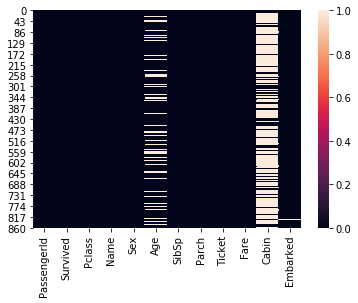

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking null values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing value are present in our dataset.

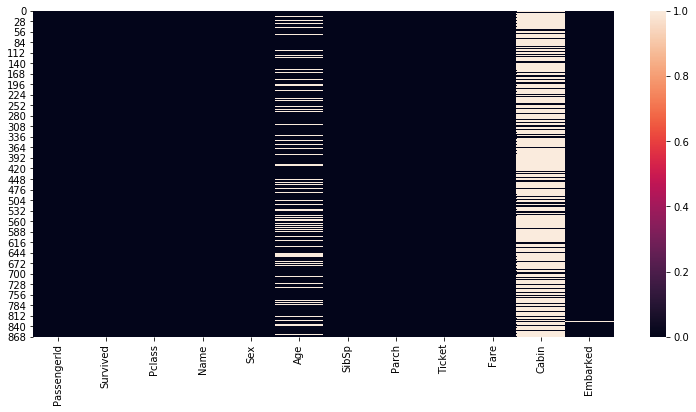

In [9]:
plt.figure(figsize=(13,6))
sns.heatmap(df.isnull())
plt.show()

As we can see here there are a lot of null values present in cabin age



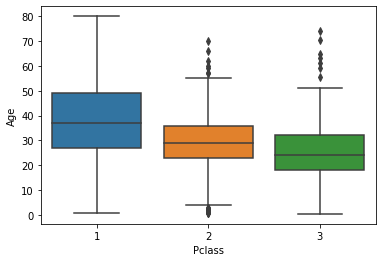

In [10]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [11]:
# we can observe the mean age on the basis of class they are present

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

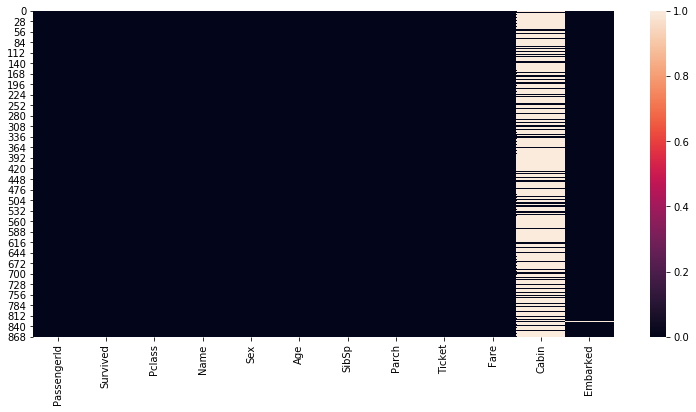

In [13]:
plt.figure(figsize=(13,6))
sns.heatmap(df.isnull())
plt.show()

Now we will delete some columns which is not useful.

In [14]:
df['Ticket'].value_counts()

347082               7
1601                 7
CA. 2343             7
347088               6
CA 2144              6
                    ..
STON/O 2. 3101269    1
364851               1
113773               1
113796               1
347087               1
Name: Ticket, Length: 681, dtype: int64

In [15]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
C22 C26        3
              ..
D45            1
F38            1
E34            1
E49            1
B37            1
Name: Cabin, Length: 147, dtype: int64

In [16]:
df['Name'].value_counts()

Asplund, Master. Edvin Rojj Felix      1
del Carlo, Mr. Sebastiano              1
Troutt, Miss. Edwina Celia "Winnie"    1
Millet, Mr. Francis Davis              1
West, Miss. Constance Mirium           1
                                      ..
Trout, Mrs. William H (Jessie L)       1
Mellors, Mr. William John              1
Olsen, Mr. Karl Siegwart Andreas       1
Fortune, Mr. Charles Alexander         1
Nysten, Miss. Anna Sofia               1
Name: Name, Length: 891, dtype: int64

In [17]:
df['PassengerId'].value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistical Evaluation of dataset



In [19]:
df=df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)

Droping above mentioned columns because they are categorical columns and not related with prediction.



In [20]:
def clean(df):
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        df[col].fillna(df[col].median(), inplace=True)
        
    df.Embarked.fillna("U", inplace=True)
    return df
df = clean(df)

Removing Missing value from all columns and replace "U" with Embarked column NaN value.



# Data Encoding

# Converting 'Embarked' and 'Sex' columns into categorical column.

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,24.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


# Data Visualization

Checking for correlation

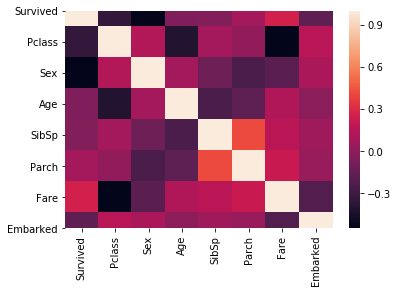

In [22]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)

Here we can see correlation between different varibles. The correlation is not very strong here.



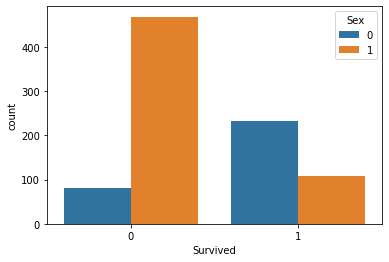

In [23]:
sns.countplot('Survived', hue='Sex', data=df)

Here we can observe that majority of people who can't survive are male.



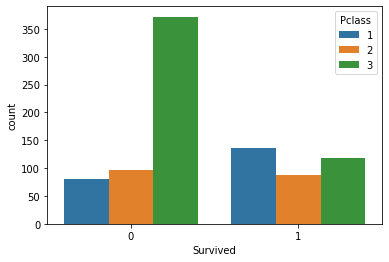

In [24]:
sns.countplot('Survived', hue='Pclass', data=df)

The majority of people died are belong to 3 class.



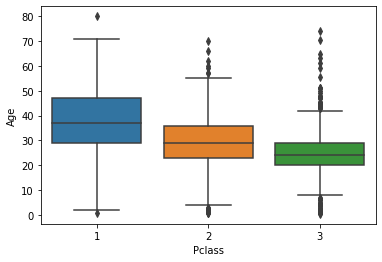

In [25]:
sns.boxplot(x='Pclass', y='Age', data=df)

We can see here, the wealthier passenger in the first class and second class tends to actully a bit older than passengers in third class.



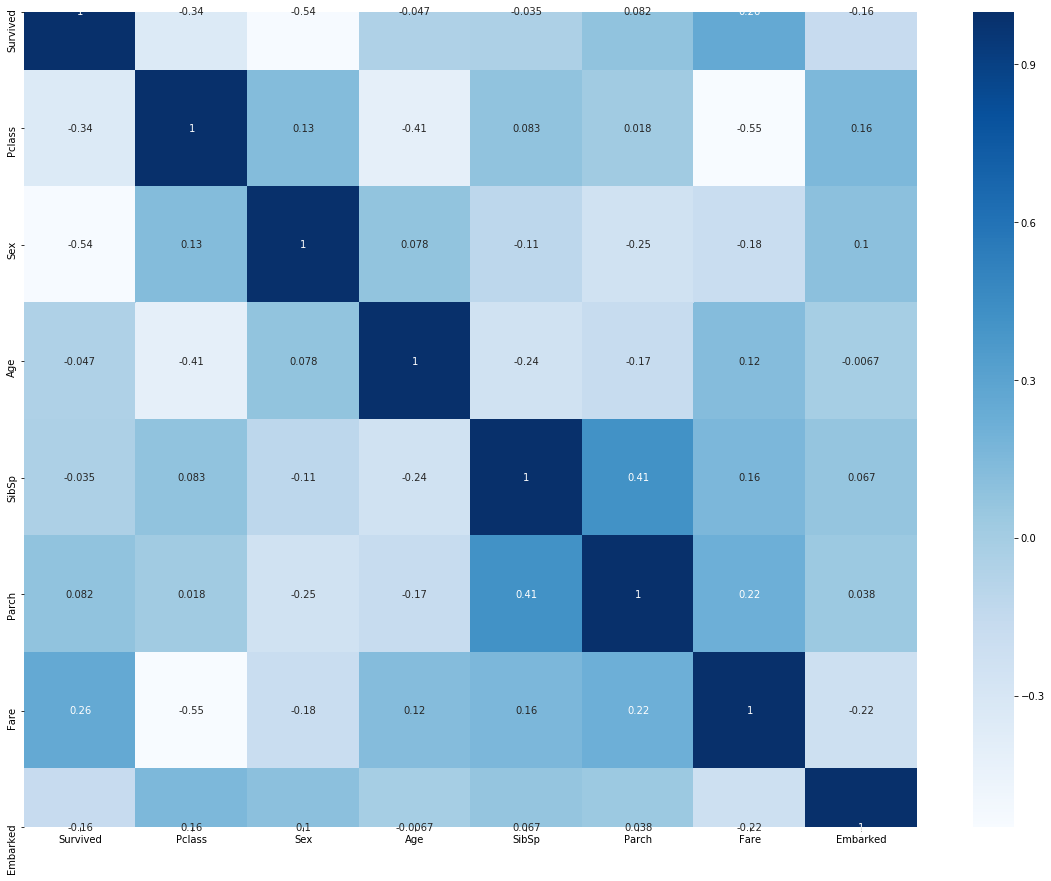

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcor,cmap='Blues',annot=True)

With the help of graphical correlation. We are getting the all data highly correlated with each other.



# Univariate Analysis

# Ploting Outliers by Box Plot

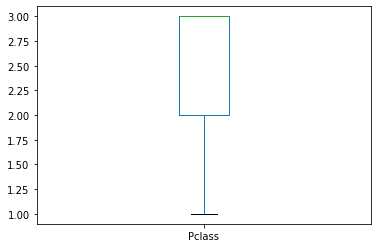

In [27]:
df['Pclass'].plot.box()

No outliers are present in Pclass column.

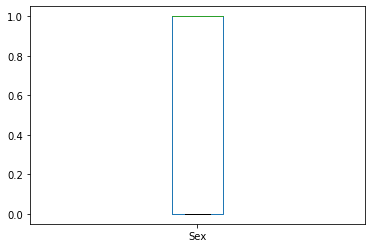

In [28]:
df['Sex'].plot.box()

No outliers are present in Sex column.

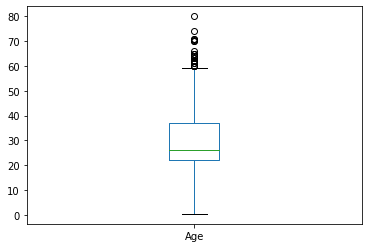

In [29]:
df['Age'].plot.box()

As we are getting lots of outlier are present in above boxplot.

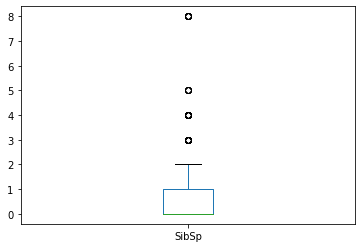

In [30]:
df['SibSp'].plot.box()

Outliers are pesent in SibSp column

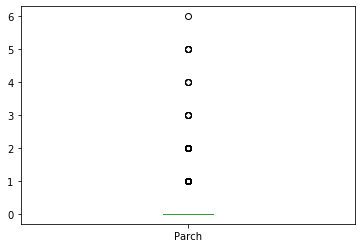

In [31]:
df['Parch'].plot.box()

Outliers are present in Parch column

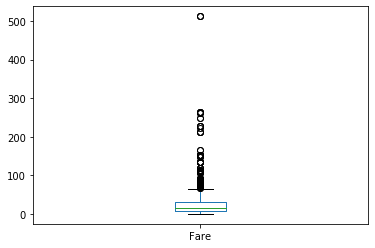

In [32]:
df['Fare'].plot.box()

Outliers are present in Fare column

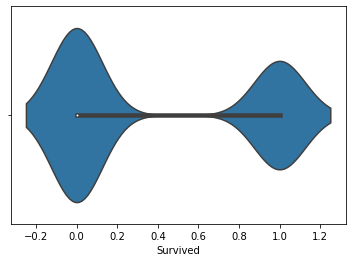

In [33]:
sns.violinplot(x='Survived',data=df)
plt.show()

With help of violinplot in Target variable two value are present 0 or 1.



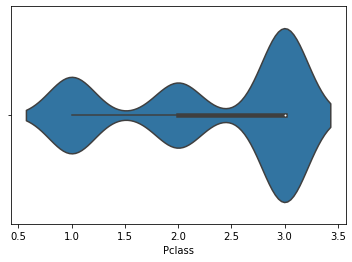

In [34]:
sns.violinplot(x='Pclass',data=df)
plt.show()

Multiple values are present in Pclass column.



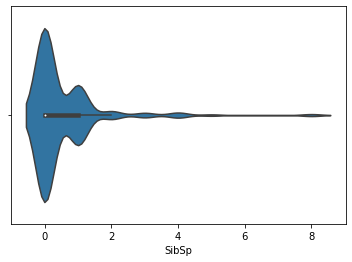

In [35]:
sns.violinplot(x='SibSp',data=df)
plt.show()

In SibSp column Maximum data is Zero and very few are between 1 to 8



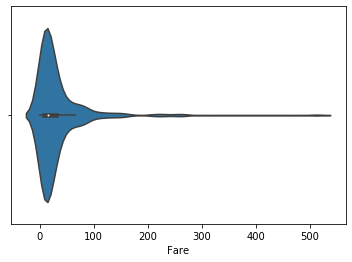

In [36]:
sns.violinplot(x='Fare',data=df)
plt.show()

We are plot fare with the help of violinplot and as we are seeing the multiple fare are there.



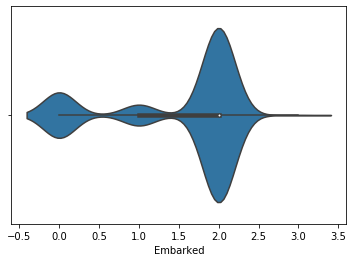

In [37]:
sns.violinplot(x='Embarked',data=df)
plt.show()

Embarked column plot with the help of violinplot.



# Bivariate Analysis

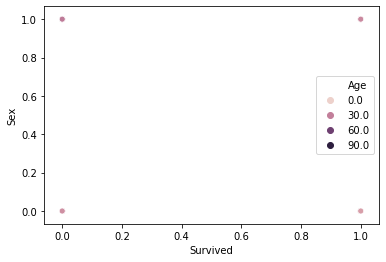

In [38]:
sns.scatterplot(data=df, x="Survived", y="Sex", hue="Age")

With the help of Scatterplot we are ploting Target variable and Sex column.

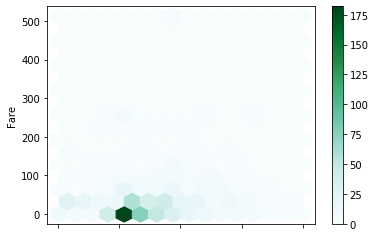

In [39]:
df.plot.hexbin(x='Age', y='Fare', gridsize=15)

Checking relation between Age of passenger and Fare of Journey



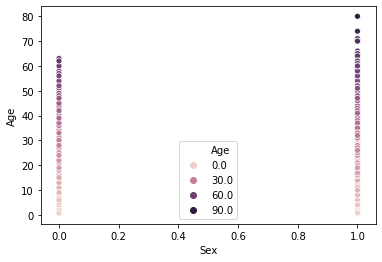

In [40]:
sns.scatterplot(data=df, x="Sex", y="Age", hue="Age")

Checking relation between Sex and Age with the help of scatterplot.



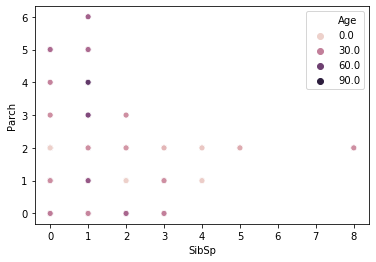

In [41]:
sns.scatterplot(data=df, x="SibSp", y="Parch", hue="Age")

Ploting SibSp and Parch column with the help of Scatterplot.



# Multivariate Analysis

In [42]:
collist=df.columns.values
ncol=12
nrows=10

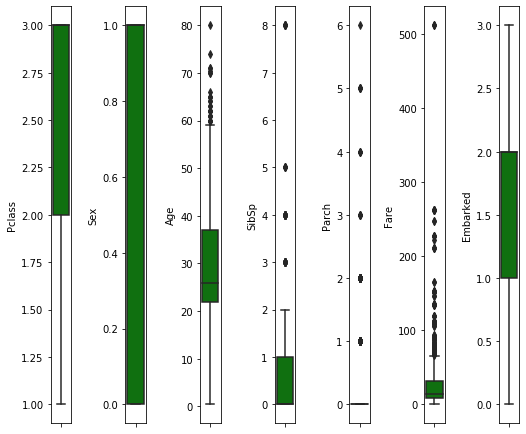

In [43]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green', orient='v')
    plt.tight_layout()

Ploting all columns by Boxplot to find outliers in a one place.



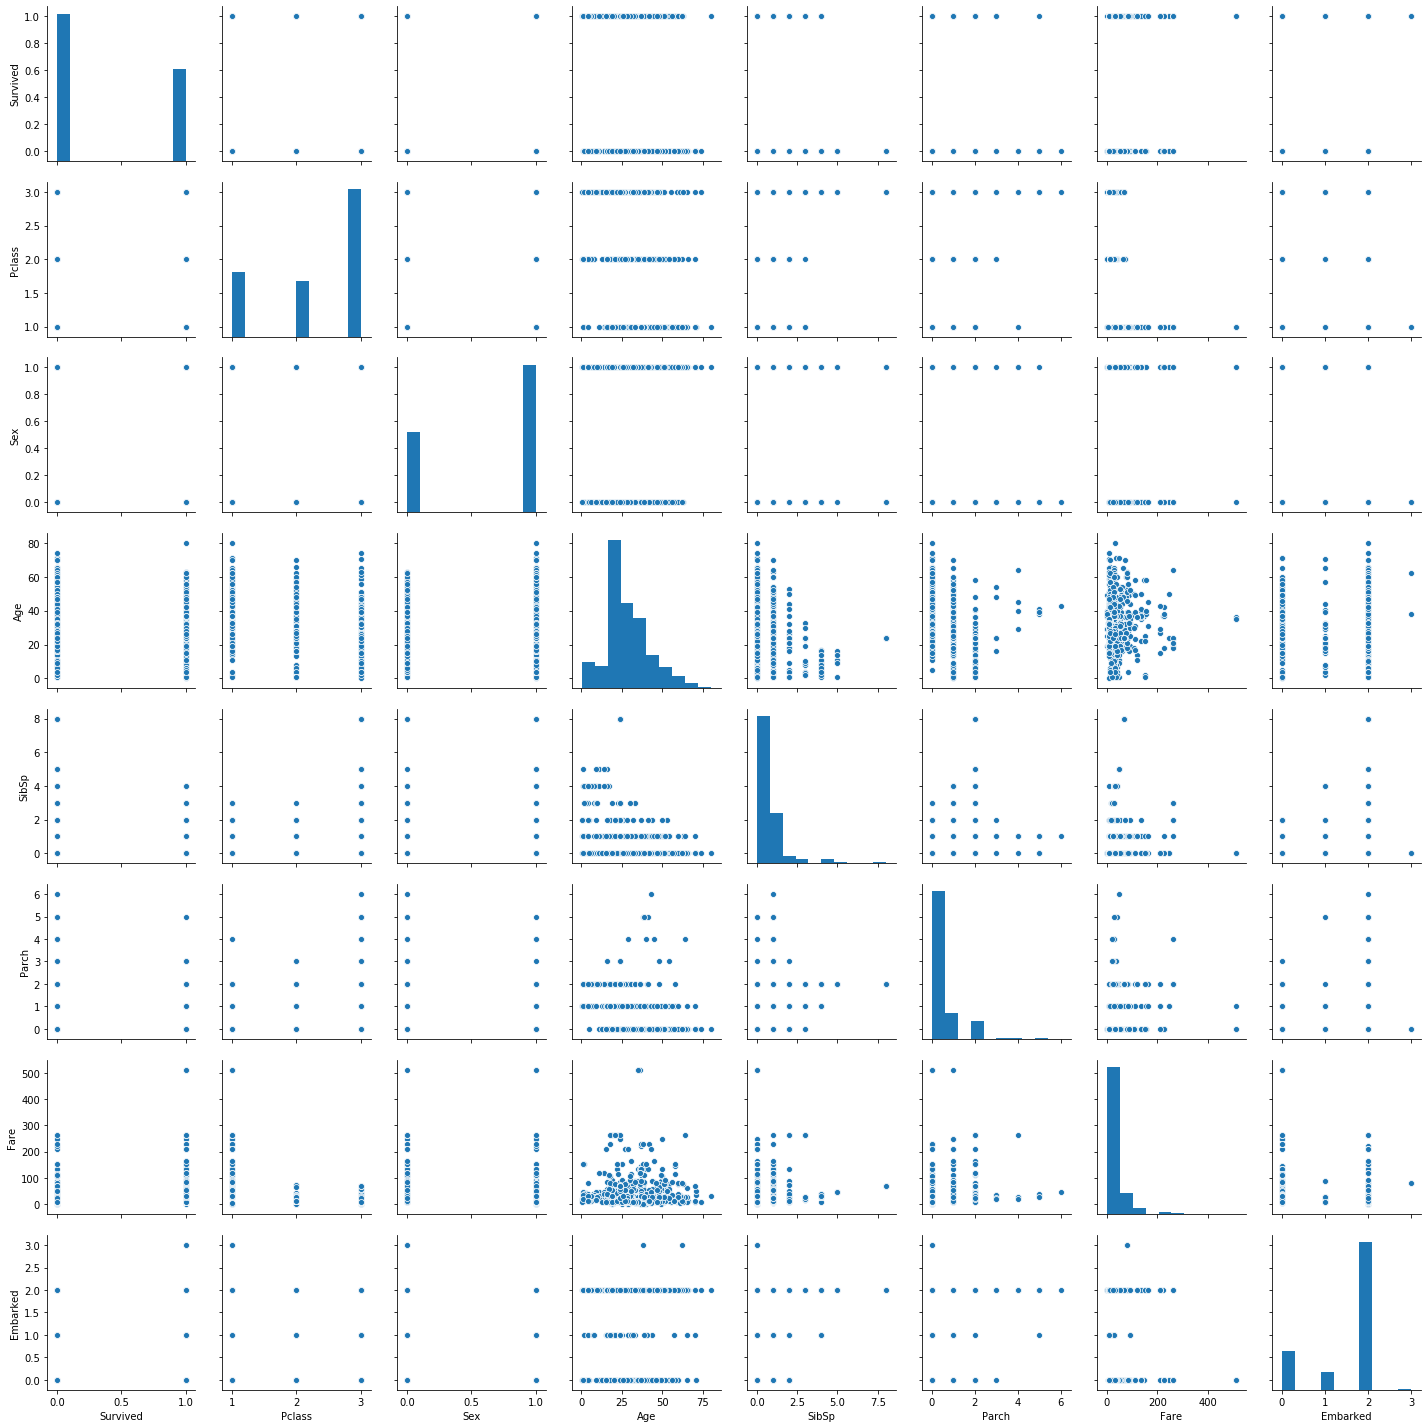

In [44]:
sns.pairplot(df)

# Zscore Value

In [45]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(df))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58111394],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.93846038],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58111394],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58111394],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.93846038],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67867322]])

Applying Zscore value on entire data for removing outliters from data.

In [47]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


Set Threshold point to data.



In [48]:
z[13][5]

5.73284383018578

In [49]:
z[863][4]

6.784163299176891

Picking randomly to check value wether it is below threshold point or not.



In [50]:
Df=df[(z<3).all(axis=1)]
Df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


With the help of above functionality we are trying to get all the values that is equal or below from threshold point.



In [51]:
df.shape

(891, 8)

Shape before Zscore value.


In [52]:
Df.shape

(820, 8)

Shape after Zscore value.


In [53]:
(71/891)*100

7.968574635241302

After using Zscore functionality we are loosing 8% approx of data but it is ok.



# Spliting All data into X and Y(Target Variable).

In [54]:
x=Df.drop('Survived',axis=1)
y=Df['Survived']

# Data Imbalance

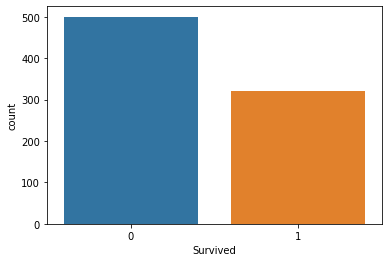

In [55]:
sns.countplot(Df['Survived'])

In [56]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [57]:
Df['Survived'].value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [58]:
(180/500)*100

36.0

As we are getting from above coutplot or from above command the data is approx equal so there is no need to use Imbalance functionality.



# Data Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.833995,0.722036,-0.574854,1.051956,-0.451141,-0.623707,0.577898
1,-1.586804,-1.384973,0.714023,1.051956,-0.451141,1.525109,-1.949444
2,0.833995,-1.384973,-0.252635,-0.563407,-0.451141,-0.601055,0.577898
3,-1.586804,-1.384973,0.472359,1.051956,-0.451141,0.914918,0.577898
4,0.833995,0.722036,0.472359,-0.563407,-0.451141,-0.596861,0.577898
...,...,...,...,...,...,...,...
815,-0.376405,0.722036,-0.172080,-0.563407,-0.451141,-0.430749,0.577898
816,-1.586804,-1.384973,-0.816518,-0.563407,-0.451141,0.139733,0.577898
817,0.833995,-1.384973,-0.413744,1.051956,3.088912,-0.080071,0.577898
818,-1.586804,0.722036,-0.252635,-0.563407,-0.451141,0.139733,-1.949444


We are Scaling all Independent variable with the help of Standard Scaler.



In [60]:
X=dx

In [61]:
#Spliting the all data into X and y for model building

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Spliting X and y into Train data and Test data for model building.

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)

# Model Building

# Linear Support Vector Classifier

In [64]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train.ravel())
predsvc=clf.predict(X_test)        
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8376383763837638
[[154  19]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       173
           1       0.79      0.74      0.77        98

    accuracy                           0.84       271
   macro avg       0.83      0.82      0.82       271
weighted avg       0.84      0.84      0.84       271



Linear Support Vector Classifier Algorithm performing very good and the score is 83.7%



# Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8228782287822878
[[149  24]
 [ 24  74]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       173
           1       0.76      0.76      0.76        98

    accuracy                           0.82       271
   macro avg       0.81      0.81      0.81       271
weighted avg       0.82      0.82      0.82       271



Decision Tree Classifier Algorithm performing very good and the score is 83%


# KNeighbors Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights='distance', algorithm='brute')
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8191881918819188
[[154  19]
 [ 30  68]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       173
           1       0.78      0.69      0.74        98

    accuracy                           0.82       271
   macro avg       0.81      0.79      0.80       271
weighted avg       0.82      0.82      0.82       271



KNeighbors Classifier Algorithm performing very good and the score is 81.9%



# AdaBoost Classifier

In [67]:
ad=AdaBoostClassifier(base_estimator=None,n_estimators=50, algorithm='SAMME')
ad.fit(X_train,y_train) 
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8302583025830258
[[151  22]
 [ 24  74]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       173
           1       0.77      0.76      0.76        98

    accuracy                           0.83       271
   macro avg       0.82      0.81      0.82       271
weighted avg       0.83      0.83      0.83       271



AdaBoost Classifier Algorithm performing very good and the score is 83%



# Random Forest Classifier

In [68]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8376383763837638
[[154  19]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       173
           1       0.79      0.74      0.77        98

    accuracy                           0.84       271
   macro avg       0.83      0.82      0.82       271
weighted avg       0.84      0.84      0.84       271



Random Forest Classifier Algorithm performing very good and the score is 83.7%



# LogisticRegression

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy Score: 0.8265682656826568
[[153  20]
 [ 27  71]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       173
           1       0.78      0.72      0.75        98

    accuracy                           0.83       271
   macro avg       0.82      0.80      0.81       271
weighted avg       0.82      0.83      0.83       271



LogisticRegression Algorithm performing very good and the score is 82.6%

# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
clf=cross_val_score(clf,X,y,cv=5)
print("Cross Validation Score of LinearSVC:",clf.mean())

Cross Validation Score of LinearSVC: 0.7939024390243904


In [72]:
dtc=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of DecisionTreeClassifier:",dtc.mean())

Cross Validation Score of DecisionTreeClassifier: 0.7731707317073171


In [73]:
knn=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of KNeighborsClassifier:",knn.mean())

Cross Validation Score of KNeighborsClassifier: 0.7914634146341464


In [74]:
ad=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of AdaBoostClassifier:",ad.mean())

Cross Validation Score of AdaBoostClassifier: 0.7804878048780488


In [75]:
rf=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of RandomForestClassifier:",rf.mean())

Cross Validation Score of RandomForestClassifier: 0.7975609756097561


In [76]:
lr=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LogisticRegression:",lr.mean())

Cross Validation Score of LogisticRegression: 0.7963414634146342


Minimum Difference in accuracy and cross validation score is for KNeighborsClassifier so this is our best model


# Hyper parameter tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
knn = KNeighborsClassifier()
grid_parameters = {'weights':['uniform','distance'],'algorithm':['brute']}
grid_sr = GridSearchCV(estimator=knn,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_result)
print(best_model)

0.777931609674729
KNeighborsClassifier(algorithm='brute')


In [79]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [80]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)

In [81]:
GridCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [82]:
GridCV.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [83]:
Best_mod1 = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth= 20, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 10)
Best_mod1.fit(X_train,y_train)
rfpred = Best_mod1.predict(X_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

85.60885608856088


In [84]:
#Import ROC_Curve.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [85]:
y_pred_prob=best_model.predict_proba(X_test)[:,1]
y_pred_prob

array([0. , 0. , 0. , 0. , 0.8, 0.8, 0. , 0.4, 1. , 0. , 0. , 0. , 0.2,
       0.6, 0. , 0.8, 1. , 0. , 0.8, 0.6, 0. , 0.4, 0. , 1. , 0.2, 1. ,
       0.4, 0.2, 1. , 0.6, 1. , 0. , 0. , 1. , 0.6, 0.8, 0.4, 0.2, 0.2,
       0. , 0. , 1. , 0. , 0.4, 0.2, 0.8, 0.4, 0. , 0.8, 0. , 0.6, 0.2,
       0.2, 0.2, 0.8, 0. , 0.4, 1. , 0. , 0. , 0.8, 0. , 0. , 0.4, 0. ,
       0.2, 0.2, 0. , 0.8, 0.4, 0. , 0.2, 0.2, 1. , 0.6, 0. , 0. , 0.4,
       0.4, 0.8, 0.8, 1. , 0.2, 0.2, 0.6, 0. , 0.4, 0.2, 0.4, 0. , 0. ,
       0.8, 0.8, 0. , 1. , 0. , 0. , 0.6, 1. , 0. , 0. , 0. , 0. , 0.4,
       1. , 1. , 1. , 0. , 0.2, 0. , 0.8, 0. , 0.2, 0.8, 0. , 0.4, 1. ,
       1. , 0. , 0.8, 0.4, 0.2, 0. , 0.4, 0.6, 1. , 1. , 0.2, 0.2, 0.2,
       0.2, 0. , 0.2, 1. , 0. , 0. , 0. , 0.6, 0. , 0.2, 0.8, 0.8, 0.2,
       0.2, 1. , 0.8, 0. , 0. , 0.2, 0. , 0. , 1. , 0. , 0. , 1. , 0.4,
       0. , 0. , 0. , 0.2, 0. , 0.6, 1. , 0.2, 0.8, 1. , 0.2, 0.4, 0. ,
       0.4, 0. , 0.2, 0. , 0.4, 0. , 0.4, 0. , 0. , 0.4, 0.4, 0.

In [86]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [87]:
fpr

array([0.        , 0.01734104, 0.08092486, 0.11560694, 0.24277457,
       0.5433526 , 1.        ])

In [88]:
tpr

array([0.        , 0.33673469, 0.60204082, 0.69387755, 0.83673469,
       0.92857143, 1.        ])

In [89]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

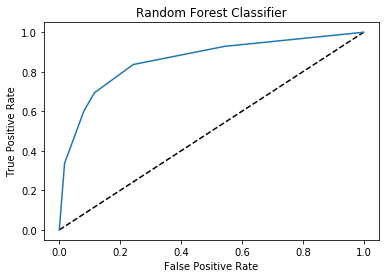

In [90]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [91]:
auc_score=roc_auc_score(y_test,best_model.predict(X_test))
print(auc_score)

0.7891353073021116


In [92]:
y_pred_prob1=Best_mod1.predict_proba(X_test)[:,1]
y_pred_prob1

array([0.16204162, 0.26343862, 0.12360613, 0.02058988, 0.79595385,
       0.87807635, 0.10605135, 0.37520133, 0.90925749, 0.04013905,
       0.13206855, 0.04570715, 0.07356489, 0.47252042, 0.14556532,
       0.72462859, 0.86991604, 0.0734901 , 0.89808866, 0.42556502,
       0.17205261, 0.33613427, 0.04225477, 0.92315485, 0.35834224,
       0.90685553, 0.24687838, 0.32666212, 0.9525937 , 0.50664174,
       0.95789349, 0.09750508, 0.07936544, 0.90463668, 0.32958665,
       0.38008914, 0.24554505, 0.12507308, 0.40018648, 0.27358075,
       0.15050323, 0.89391691, 0.11871984, 0.74762392, 0.2429949 ,
       0.37337398, 0.66195003, 0.10220286, 0.45972079, 0.08068061,
       0.63236816, 0.83838883, 0.19230236, 0.11072626, 0.41359054,
       0.03168614, 0.41575932, 0.68758882, 0.07879329, 0.36435373,
       0.92574247, 0.1106215 , 0.08006063, 0.3924933 , 0.07156567,
       0.27188507, 0.08053703, 0.13206855, 0.34105713, 0.29819481,
       0.06980021, 0.17954477, 0.17002513, 0.95380952, 0.53196

In [93]:
fpr1,tpr1,thresholds1=roc_curve(y_test,y_pred_prob)

In [94]:
fpr1

array([0.        , 0.01734104, 0.08092486, 0.11560694, 0.24277457,
       0.5433526 , 1.        ])

In [95]:
tpr1

array([0.        , 0.33673469, 0.60204082, 0.69387755, 0.83673469,
       0.92857143, 1.        ])

In [96]:
thresholds1

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

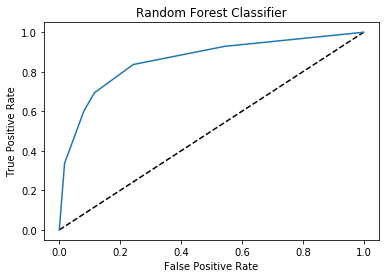

In [97]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label='Random Forest Classifier1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [98]:
auc_score1=roc_auc_score(y_test,Best_mod1.predict(X_test))
print(auc_score1)

0.8275628170343283


The score of AUC_RUC_Curve is 82%

In [99]:
from sklearn import metrics

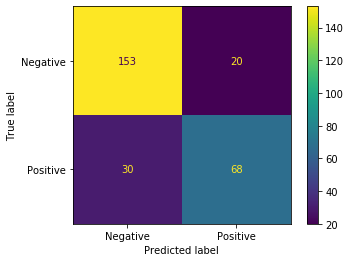

In [100]:
metrics.plot_confusion_matrix(best_model, X_test, y_test, display_labels=['Negative', 'Positive'])

# Saving The Model

In [101]:
import joblib
joblib.dump(Best_mod1,"BestModelTitanic.pkl")

['BestModelTitanic.pkl']

# Loading The Model

In [102]:
mod=joblib.load("BestModelTitanic.pkl")

In [103]:
print(mod.predict(X_test))

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 0]
